In [1]:
#%%
%load_ext autoreload
%autoreload 2
import loader
import processor
import config
import controller
import models

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
model = controller.model_pretrained(path_dir = '/home/yuhan/smartnet_20211230_regression_31bp_ss_knot_CNN/CNN_GIN_regression_dock6')
model

Using backend: pytorch


Pretrained model loaded


In [4]:
param = {}
for name,parameters in model.model.named_parameters():
    print(name,':',parameters.size())
    param[name]=parameters.detach().numpy()

gnn.node_embeddings.0.weight : torch.Size([120, 300])
gnn.node_embeddings.1.weight : torch.Size([3, 300])
gnn.gnn_layers.0.mlp.0.weight : torch.Size([600, 300])
gnn.gnn_layers.0.mlp.0.bias : torch.Size([600])
gnn.gnn_layers.0.mlp.2.weight : torch.Size([300, 600])
gnn.gnn_layers.0.mlp.2.bias : torch.Size([300])
gnn.gnn_layers.0.edge_embeddings.0.weight : torch.Size([6, 300])
gnn.gnn_layers.0.edge_embeddings.1.weight : torch.Size([3, 300])
gnn.gnn_layers.0.bn.weight : torch.Size([300])
gnn.gnn_layers.0.bn.bias : torch.Size([300])
gnn.gnn_layers.1.mlp.0.weight : torch.Size([600, 300])
gnn.gnn_layers.1.mlp.0.bias : torch.Size([600])
gnn.gnn_layers.1.mlp.2.weight : torch.Size([300, 600])
gnn.gnn_layers.1.mlp.2.bias : torch.Size([300])
gnn.gnn_layers.1.edge_embeddings.0.weight : torch.Size([6, 300])
gnn.gnn_layers.1.edge_embeddings.1.weight : torch.Size([3, 300])
gnn.gnn_layers.1.bn.weight : torch.Size([300])
gnn.gnn_layers.1.bn.bias : torch.Size([300])
gnn.gnn_layers.2.mlp.0.weight : torch.

[[-2.3990436e-02 -5.4842763e-02 -8.8456348e-02 ...  6.6035882e-02
   3.3649098e-04  2.9718060e-02]
 [-1.5838662e-02  7.3163398e-03 -2.7159303e-01 ...  1.9758837e-03
   7.0438690e-02  3.6792282e-02]
 [-3.7424877e-02 -2.1528631e-02 -6.0259491e-02 ...  6.8252408e-03
   3.0040883e-02 -2.3905119e-02]
 ...
 [-3.6025470e-01 -8.4103632e-01  1.1399561e+00 ...  8.3084208e-01
  -6.4274043e-01 -2.8730884e-01]
 [-1.1652169e+00  9.0910441e-01  1.4368460e-01 ...  2.5761363e-01
  -7.2395414e-01  7.6277591e-02]
 [-2.2517014e+00  1.4429587e+00 -1.8351452e+00 ...  1.6849455e+00
   4.2056417e+00  2.8064492e+00]]


<AxesSubplot:ylabel='Density'>

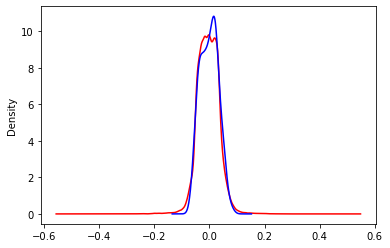

In [5]:
#CNN_CNN
RNA_p=[]
drug_p=[]
for name,p in param.items():
    if name.startswith('gnn'):
        if len(p.shape)==1:
            drug_p.extend(p.tolist())
        elif len(p.shape)==2:
            p = p.tolist()
            for pi in p:
                drug_p.extend(pi)
                
    elif name.startswith('convt') or name.startswith('se') or name.startswith('res1d') or name.startswith('res2d'):
        if len(p.shape)==1:
            RNA_p.extend(p.tolist())
        elif len(p.shape)==2:
            p = p.tolist()
            for pi in p:
                RNA_p.extend(pi)
        elif len(p.shape)==3:
            p = p.tolist()
            for pi in p:
                for pj in pi:
                    RNA_p.extend(pj)
        elif len(p.shape)==4:
            p = p.tolist()
            for pi in p:
                for pj in pi:
                    for pk in pj:
                        RNA_p.extend(pk)
import matplotlib as plt
import pandas as pd
r = pd.DataFrame({'RNA':RNA_p})
d = pd.DataFrame({'drug':drug_p})
r.RNA.plot(kind='kde',color='red')
d.drug.plot(kind='kde',color='blue')
#plt.show()

In [29]:
r.loc[:200]

,RNA


In [30]:
RNA_p

[]

<AxesSubplot:ylabel='Density'>

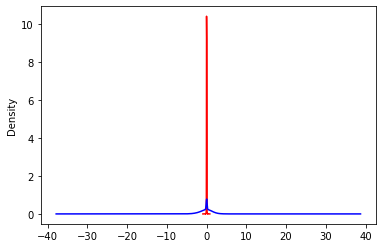

In [5]:
#CNN_CIN
RNA_p=[]
drug_p=[]
for name,p in param.items():
    if name.startswith('gnn'):
        if len(p.shape)==1:
            drug_p.extend(p.tolist())
        elif len(p.shape)==2:
            p = p.tolist()
            for pi in p:
                drug_p.extend(pi)
                
    elif name.startswith('convt') or name.startswith('se') or name.startswith('res1d') or name.startswith('res2d'):
        if len(p.shape)==1:
            RNA_p.extend(p.tolist())
        elif len(p.shape)==2:
            p = p.tolist()
            for pi in p:
                RNA_p.extend(pi)
        elif len(p.shape)==3:
            p = p.tolist()
            for pi in p:
                for pj in pi:
                    RNA_p.extend(pj)
        elif len(p.shape)==4:
            p = p.tolist()
            for pi in p:
                for pj in pi:
                    for pk in pj:
                        RNA_p.extend(pk)
import matplotlib as plt
import pandas as pd
r = pd.DataFrame({'RNA':RNA_p})
d = pd.DataFrame({'drug':drug_p})
r.RNA.plot(kind='kde',color='red')
#d.drug.plot(kind='kde',color='blue')

(-0.6, 0.6)

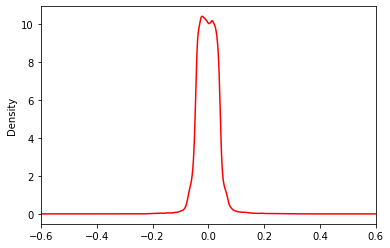

In [17]:
#CNN_GIN
RNA_p=[]
drug_p=[]
for name,p in param.items():
    if name.startswith('gnn'):
        if len(p.shape)==1:
            drug_p.extend(p.tolist())
        elif len(p.shape)==2:
            p = p.tolist()
            for pi in p:
                drug_p.extend(pi)
                
    elif name.startswith('convt') or name.startswith('se') or name.startswith('res1d') or name.startswith('res2d'):
        if len(p.shape)==1:
            RNA_p.extend(p.tolist())
        elif len(p.shape)==2:
            p = p.tolist()
            for pi in p:
                RNA_p.extend(pi)
        elif len(p.shape)==3:
            p = p.tolist()
            for pi in p:
                for pj in pi:
                    RNA_p.extend(pj)
        elif len(p.shape)==4:
            p = p.tolist()
            for pi in p:
                for pj in pi:
                    for pk in pj:
                        RNA_p.extend(pk)
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
r = pd.DataFrame({'RNA':RNA_p})
d = pd.DataFrame({'drug':drug_p})
f=Figure(figsize=(8,6))
r.RNA.plot(kind='kde',color='red')
plt.xlim(-0.6,0.6)
#d.drug.plot(kind='kde',color='blue')

In [ ]:
model = controller.model_pretrained(path_dir = '/home/yuhan/smartnet_20211230_regression_31bp_ss_knot_CNN/CNN_GIN_regression_dock6')
model